# EDA & Modelling

In [1]:
random_state = 42

## Package loading

In [2]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Project name

In [3]:
name = 'cancer'

# Exploratory Data Analysis 

## Thresholds & other parameters

In [4]:
problem_type = 'classification'

In [5]:
data_size = 'large'

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 5

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 1.0

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

In [17]:
CPU = False

In [18]:
time_dep = False

In [19]:
date_idx = 0

In [20]:
lag_number = 3

In [21]:
level_1_model = 'regression'

## File & target

In [22]:
path = '/home/fifi/Documents/ezstacking/dataset/cancer patient data sets.csv'

In [23]:
df = pd.read_csv(path)

In [24]:
target_col = 'Level'

### Deployment

In [25]:
FastAPI_port = 8000

In [26]:
Docker_port = 80

# Drop user's columns & Duplicates:

In [29]:
user_drop_cols = ['index', 'Patient Id']

Dataset before deletion

In [30]:
display(df)

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

In [31]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [32]:
df = duplicates(df)

Number of rows before removing: 1000
Number of duplicate rows: 848
Number of rows after removing: 152


Dataset after deletion of user’s columns and duplicates

In [33]:
display(df)

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
497   35       1              2            1             2   
977   45       1              3            1             4   
979   53       1              3            1             4   
983   26       1              3            2             4   
984   37       1              1            2             3   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
497                     1             2                     1              2   
977                     3             2                     3              4   
979                     2             3                     2              3   
983                     2             3                     2              3   
984                     4             2                     4              3   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
497        3  ...        3            4                    5         1   
977        3  ...        3            2                    2         4   
979        3  ...        2            2                    3         4   
983        3  ...        4            5                    6         5   
984        3  ...        4            1                    2         4   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
497                      3                         2              1   
977                      2                         2              3   
979                      1                         5              2   
983                      5                         4              6   
984                      6                         5              4   

     Dry Cough  Snoring   Level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
497          2        2     Low  
977          4        3     Low  
979          6        2     Low  
983          5        4  Medium  
984          2        5  Medium  

[152 rows x 24 columns]

### Dataset copy

In [34]:
df_copy = df.copy()

# Dataset Information

### Dataframe structure

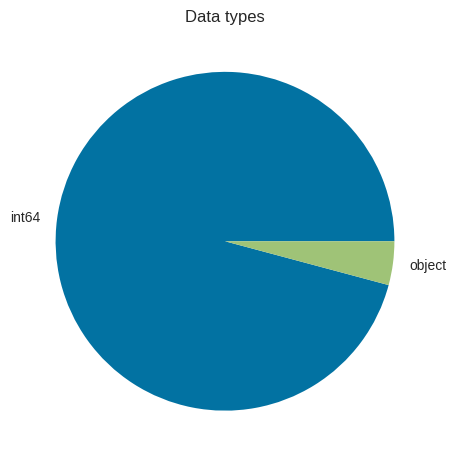

In [35]:
plot_dataframe_structure(df)

### Dataframe statistics

In [36]:
display(df.describe().T)

count       mean        std   min    25%   50%  \
Age                       152.0  38.236842  11.798382  14.0  28.00  37.0   
Gender                    152.0   1.414474   0.494259   1.0   1.00   1.0   
Air Pollution             152.0   3.717105   1.978084   1.0   2.00   3.0   
Alcohol use               152.0   4.480263   2.601503   1.0   2.00   5.0   
Dust Allergy              152.0   5.046053   2.027424   1.0   3.75   6.0   
OccuPational Hazards      152.0   4.710526   2.158095   1.0   3.00   5.0   
Genetic Risk              152.0   4.486842   2.143794   1.0   2.00   5.0   
chronic Lung Disease      152.0   4.243421   1.880527   1.0   3.00   4.0   
Balanced Diet             152.0   4.427632   2.151857   1.0   2.00   4.0   
Obesity                   152.0   4.414474   2.120365   1.0   3.00   4.0   
Smoking                   152.0   3.973684   2.473562   1.0   2.00   3.0   
Passive Smoker            152.0   4.151316   2.263327   1.0   2.00   4.0   
Chest Pain                152.0   4.388158   2.278751   1.0   2.00   4.0   
Coughing of Blood         152.0   4.796053   2.453107   1.0   3.00   4.0   
Fatigue                   152.0   3.763158   2.230840   1.0   2.00   3.0   
Weight Loss               152.0   3.828947   2.233924   1.0   2.00   3.0   
Shortness of Breath       152.0   4.269737   2.263943   1.0   2.00   4.0   
Wheezing                  152.0   3.776316   2.036740   1.0   2.00   4.0   
Swallowing Difficulty     152.0   3.750000   2.196475   1.0   2.00   4.0   
Clubbing of Finger Nails  152.0   3.894737   2.344948   1.0   2.00   4.0   
Frequent Cold             152.0   3.480263   1.848466   1.0   2.00   3.0   
Dry Cough                 152.0   3.684211   2.047195   1.0   2.00   3.0   
Snoring                   152.0   2.921053   1.542022   1.0   2.00   3.0   

                           75%   max  
Age                       46.0  73.0  
Gender                     2.0   2.0  
Air Pollution              6.0   8.0  
Alcohol use                7.0   8.0  
Dust Allergy               7.0   8.0  
OccuPational Hazards       7.0   8.0  
Genetic Risk               7.0   7.0  
chronic Lung Disease       6.0   7.0  
Balanced Diet              7.0   7.0  
Obesity                    7.0   7.0  
Smoking                    7.0   8.0  
Passive Smoker             7.0   8.0  
Chest Pain                 7.0   9.0  
Coughing of Blood          7.0   9.0  
Fatigue                    5.0   9.0  
Weight Loss                6.0   8.0  
Shortness of Breath        6.0   9.0  
Wheezing                   5.0   8.0  
Swallowing Difficulty      5.0   8.0  
Clubbing of Finger Nails   5.0   9.0  
Frequent Cold              5.0   7.0  
Dry Cough                  5.0   7.0  
Snoring                    4.0   7.0

### Which columns could be categorical ?

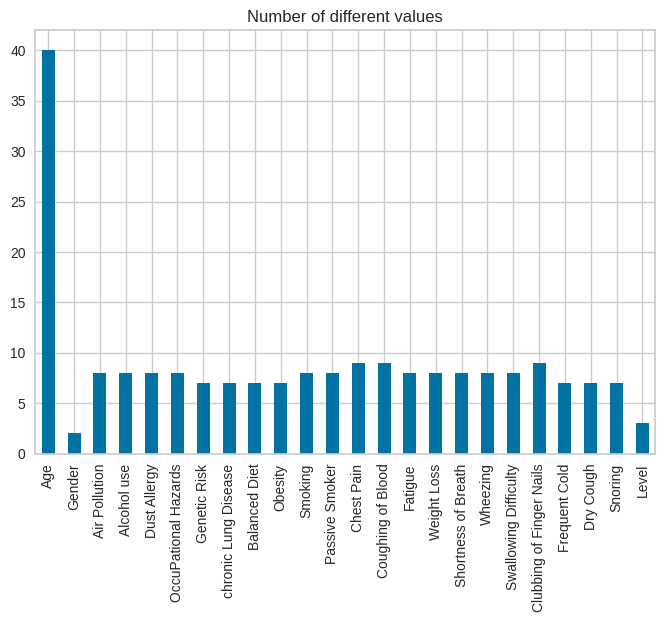

In [37]:
plot_categorical(df)

# Dataset Cleaning

### Drop NaN:

In [38]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [39]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [40]:
display(dropped_cols)

array(['Patient Id', 'index'], dtype='<U32')

### Encoding data:

In [41]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Age
Column  Gender  is categorical.
Encoding numeric column: Air Pollution
Encoding numeric column: Alcohol use
Encoding numeric column: Dust Allergy
Encoding numeric column: OccuPational Hazards
Encoding numeric column: Genetic Risk
Encoding numeric column: chronic Lung Disease
Encoding numeric column: Balanced Diet
Encoding numeric column: Obesity
Encoding numeric column: Smoking
Encoding numeric column: Passive Smoker
Encoding numeric column: Chest Pain
Encoding numeric column: Coughing of Blood
Encoding numeric column: Fatigue
Encoding numeric column: Weight Loss
Encoding numeric column: Shortness of Breath
Encoding numeric column: Wheezing
Encoding numeric column: Swallowing Difficulty
Encoding numeric column: Clubbing of Finger Nails
Encoding numeric column: Frequent Cold
Encoding numeric column: Dry Cough
Encoding numeric column: Snoring
Encoding object column: Level


### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


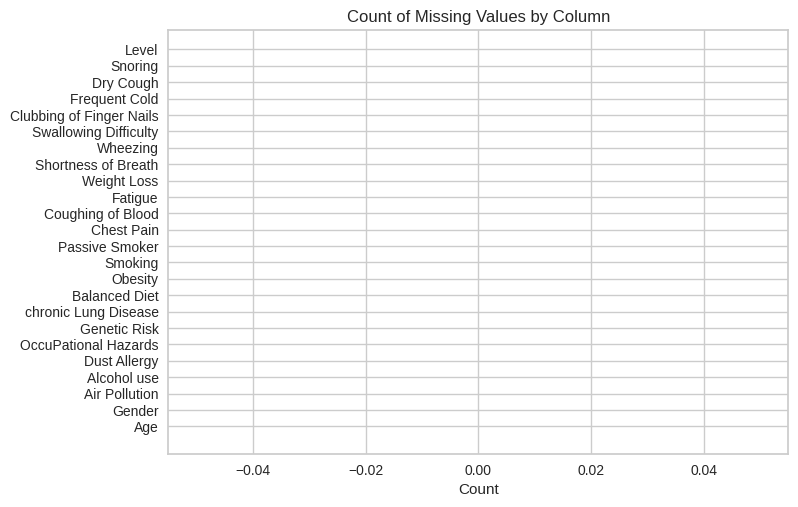

In [42]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

#### Imputation

In [43]:
df = imputation(df)

No need to impute data.


### Data compression:

In [44]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.03MB
Memory usage after optimization is: 0.01MB
Decreased by 72.4%


#### Dataframe structure after compression

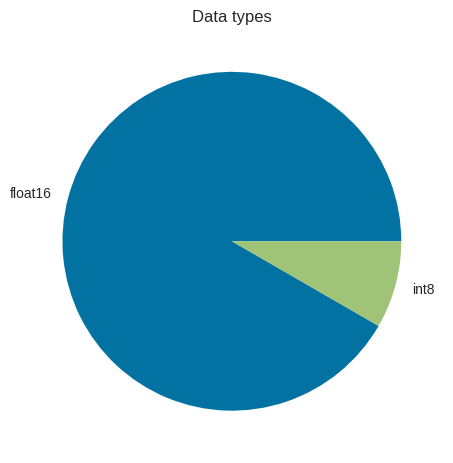

In [45]:
plot_dataframe_structure(df)

### Outliers:

In [46]:
df = outliers(df, threshold_Z)

Using Z_score,  0  rows will be suppressed.


# Plottings

# Ranking 

#### Ranking 1D 

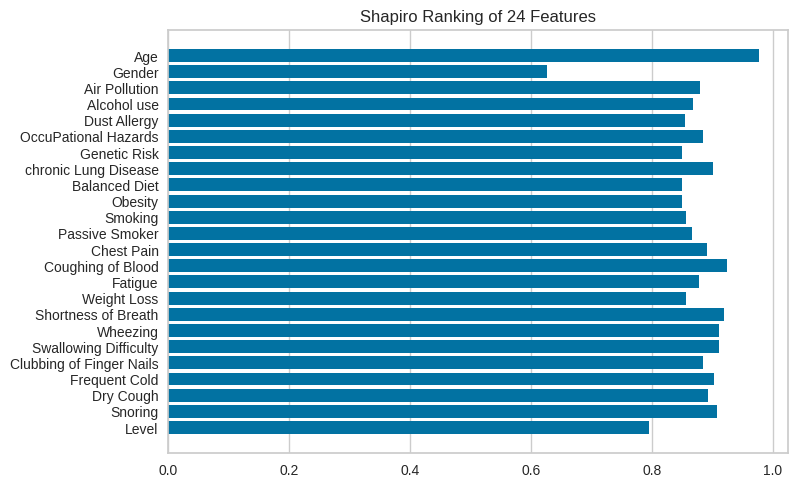

In [47]:
rank1d(df);

#### Ranking 2D 

##### Ranking 2D according to Pearson

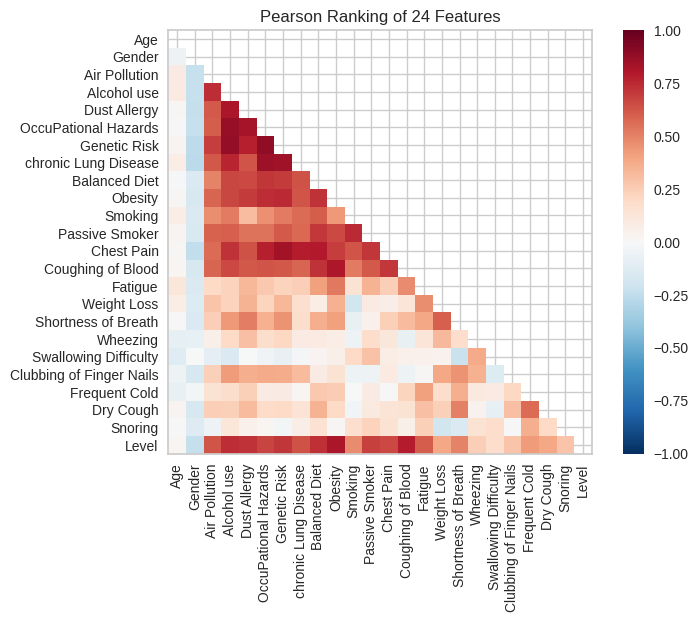

In [48]:
rank2d(df, algorithm='pearson');

##### Ranking 2D based on covariance

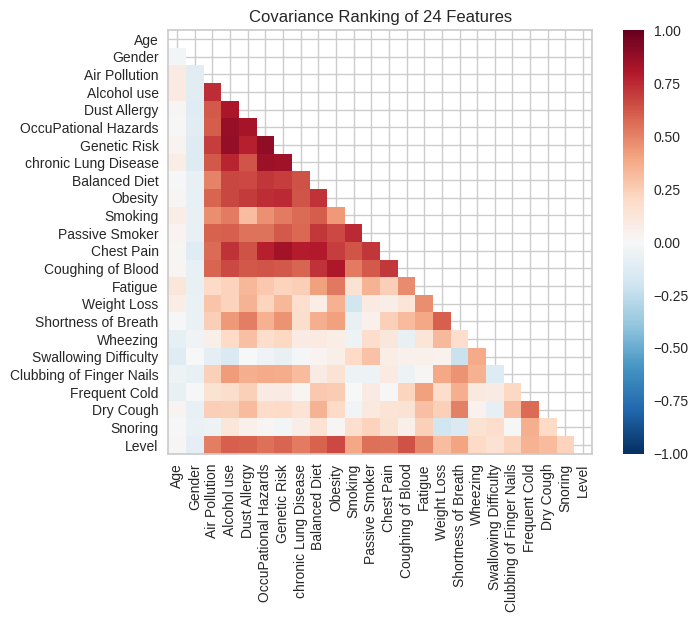

In [49]:
rank2d(df, algorithm='covariance');

##### Ranking 2D according to Spearman

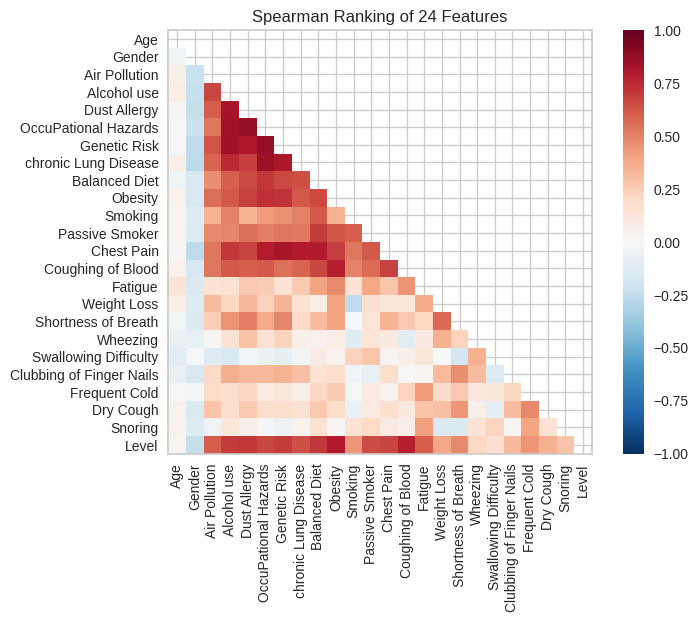

In [50]:
rank2d(df, algorithm='spearman');

##### Ranking 2D according to Kendalltau

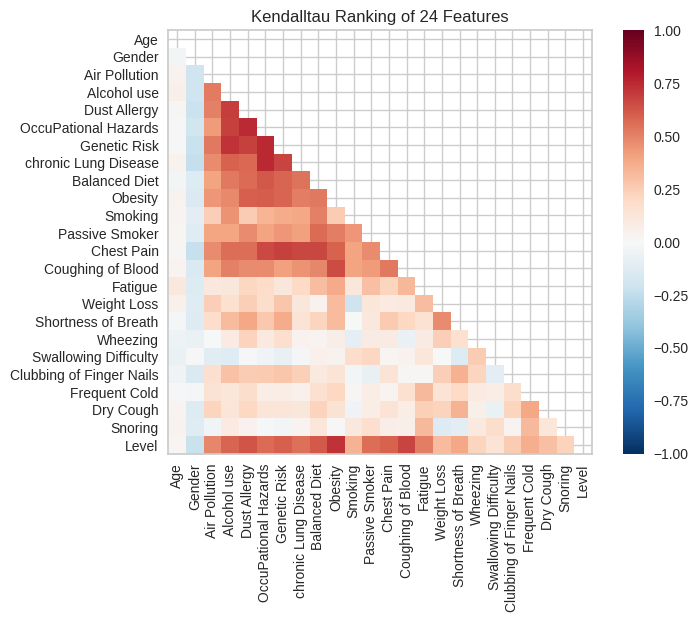

In [51]:
rank2d(df, algorithm='kendalltau');

# Correlation according to Pearson

In [52]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [53]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

### Check columns that should be dropped

In [54]:
print(dropped_cols)

[]


# Correlation according to Spearman (hierarchical clustering)

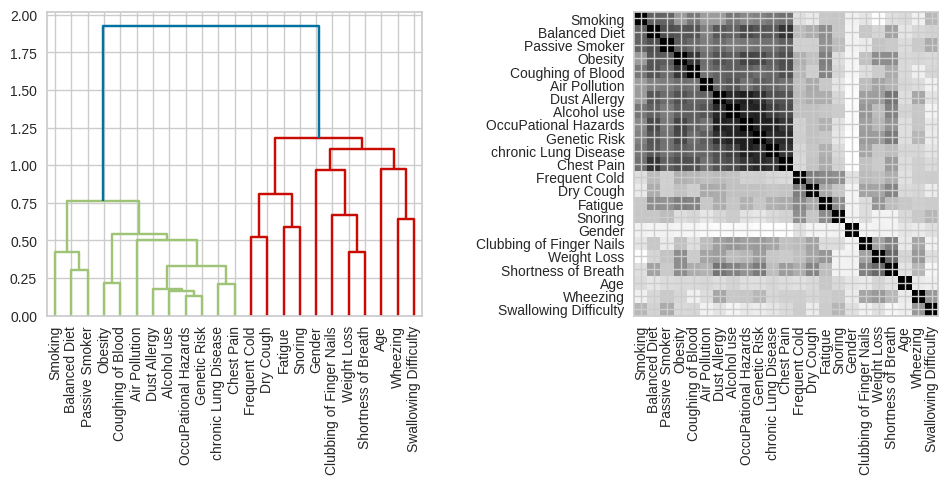

In [55]:
hierarchical_clustering(df.drop(target_col, axis=1))

#### Splitting dataframe in features and targets

In [56]:
y = df[target_col]

In [57]:
X = df.drop(target_col, axis=1)

##### Correlation with Yellow Bricks

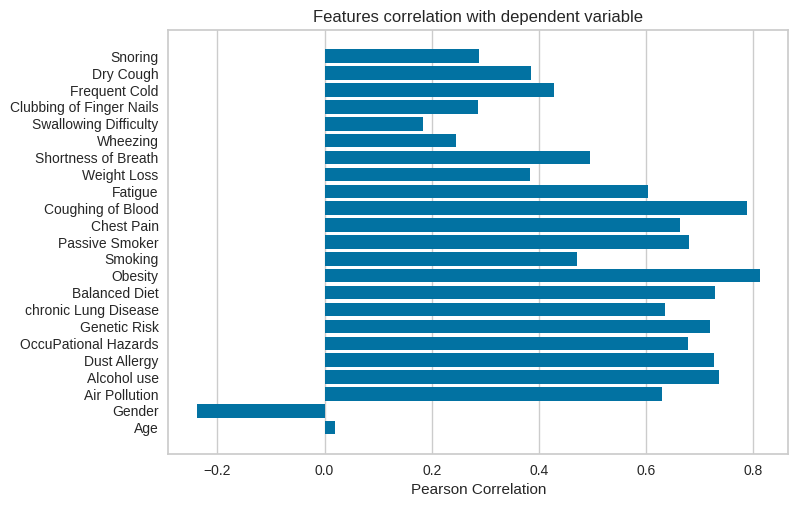

In [58]:
feature_correlation(X, y);

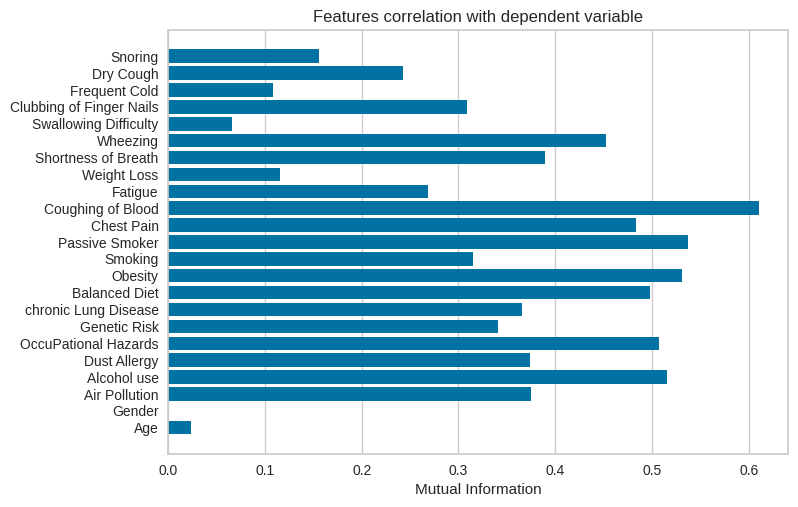

In [59]:
feature_correlation(X, y, method='mutual_info-classification');

# PCA

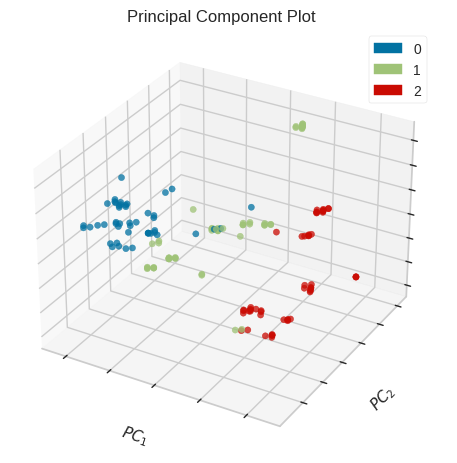

In [60]:
pca_decomposition(X, y.astype(int), projection=3);

# Class balancing

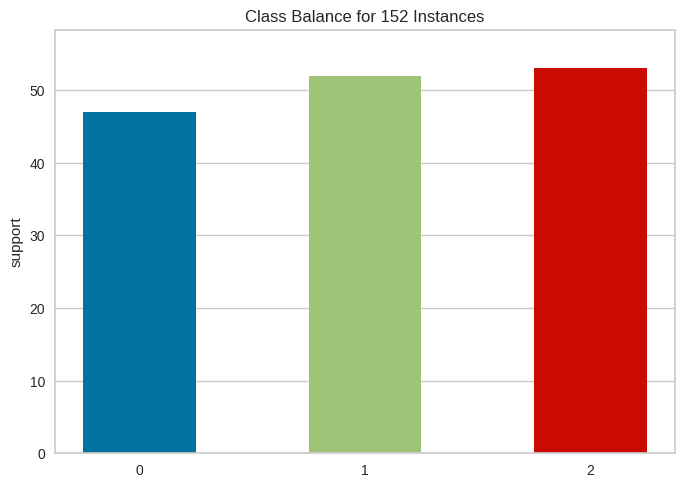

Entropy =  0.998764525268568


In [61]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

# Splittings 

In [62]:
df = df_copy

## Splitting dataframe in features and targets

In [63]:
y = df[target_col]

In [64]:
X = df.drop(target_col, axis=1)

## Dimensions

In [65]:
nb_features = len(X.columns.tolist())

In [66]:
nb_targets = len(y.unique())

In [67]:
layer_size = nb_features + nb_targets + 2

## Splitting data in train and test sets 

In [68]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state)

## Encoding

In [69]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

# Modelling

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [70]:
cat_selector = make_column_selector(dtype_include=object)

In [71]:
num_selector = make_column_selector(dtype_include=np.number)

#### For models based on tree

In [72]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [73]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [74]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

#### For models not based on tree

In [75]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [76]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [77]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

#### Level-0 models

In [78]:
level_0 = [ 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=100, random_state = random_state))), 
          ('RFCE', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=100, random_state = random_state))), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True, random_state = random_state))), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet', random_state = random_state))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet', random_state = random_state))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('GBC', make_pipeline(tree_preprocessor, GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state = random_state))), 
          ]

#### Level-1 model

In [79]:
level_1 = LogisticRegression(random_state = random_state)

#### Stacking for classification

In [80]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

# Model fitting

In [81]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

CPU times: user 385 ms, sys: 170 ms, total: 554 ms
Wall time: 12.4 s


StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=42))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f985c4a5fc0>),
                                                                                                  ('pipeline-2',
                                                                                                   Pipeline(ste...
                                                                                                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                   unknown_value=-1))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9870a799c0>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=1.0))])),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            max_depth=1,
                                                                            random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Model evaluation

### Model scoring

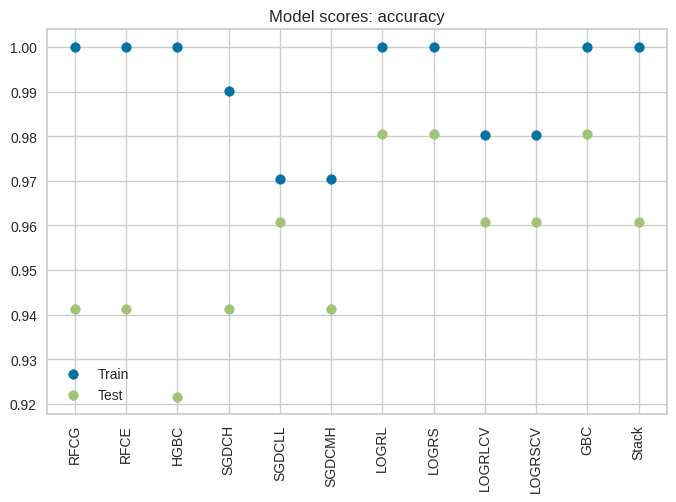

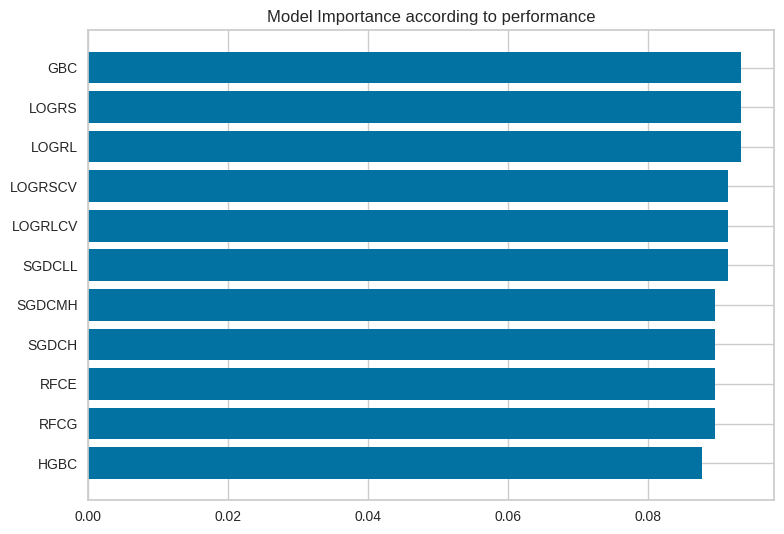

In [82]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### ROC/AUC

In [83]:
classes = y.unique()

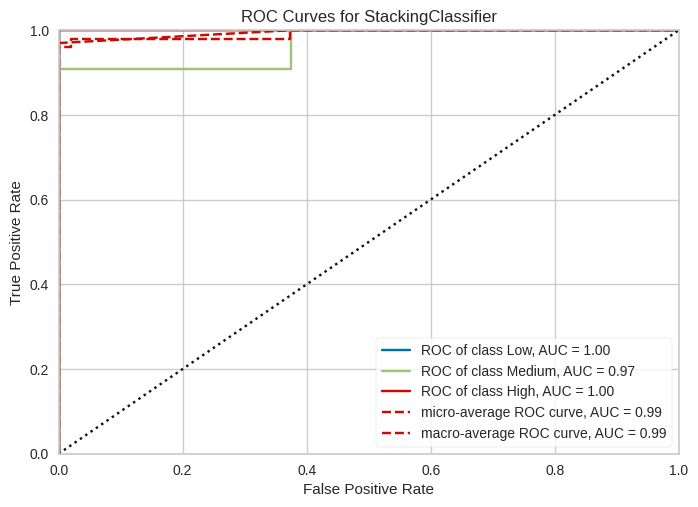

In [84]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Classification report

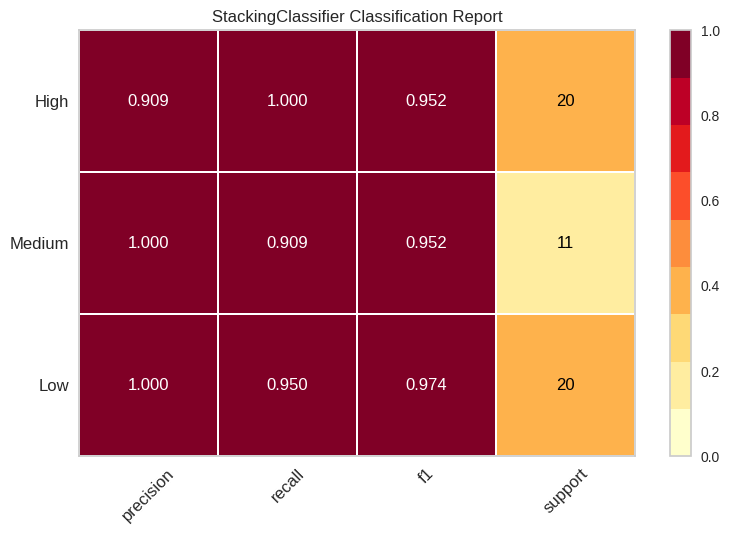

In [85]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Confusion matrix

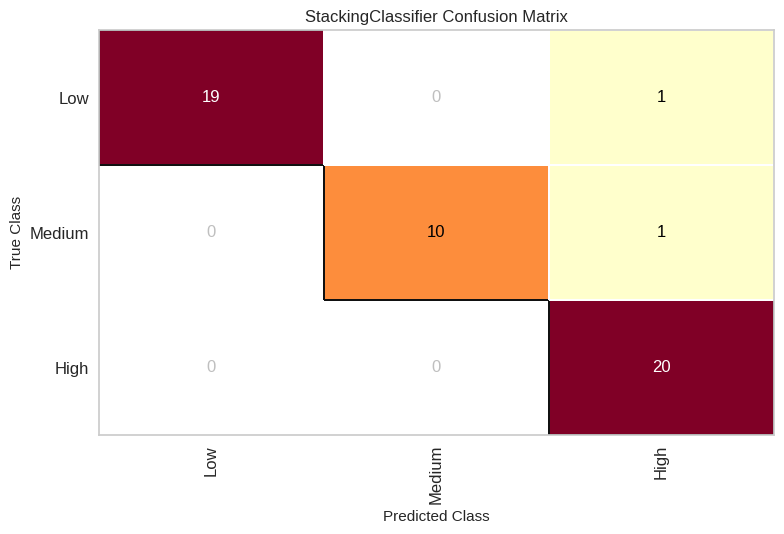

In [86]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Class prediction error

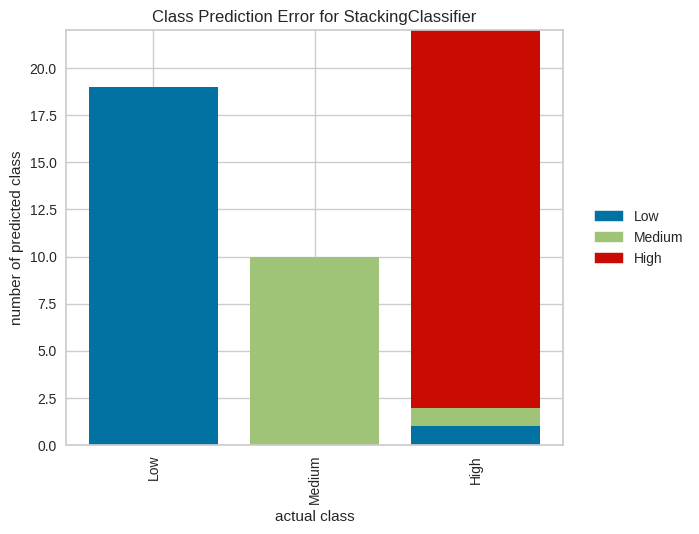

In [87]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

# Model inspection

### Model importance

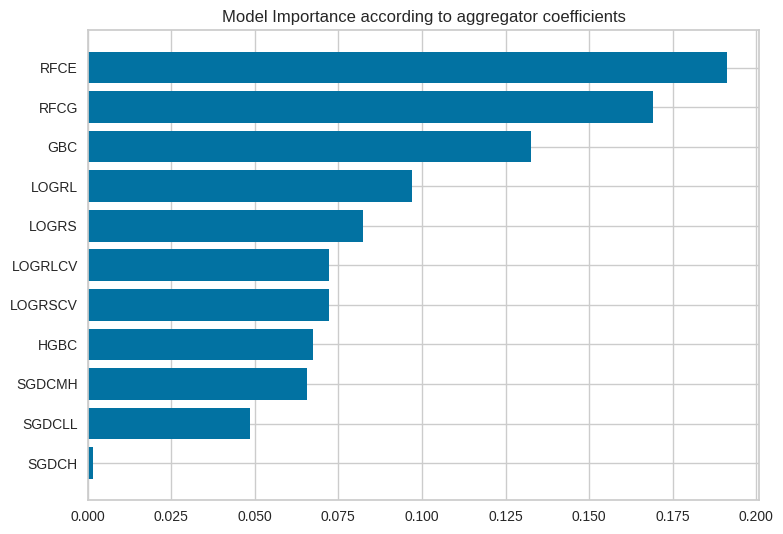

In [88]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

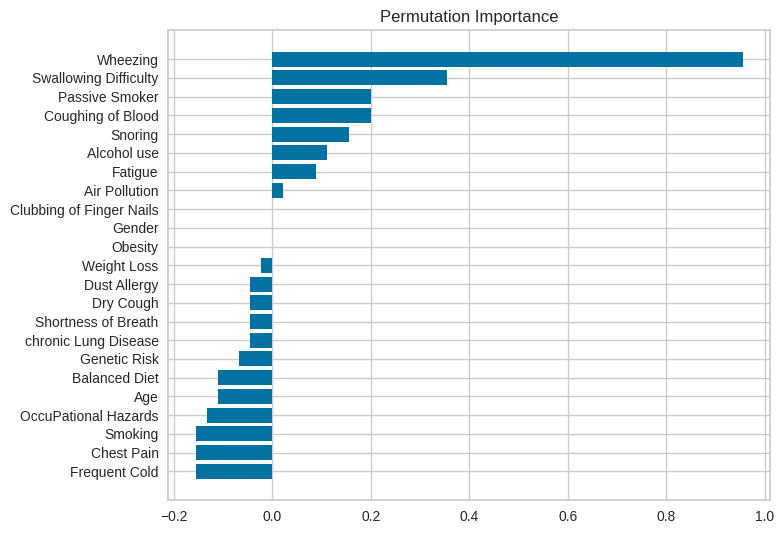

In [89]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Level-0 model elimination

#### Filtered Level-0 models

In [90]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Level-1 model with filtration

In [91]:
level_1 = LogisticRegression(random_state = random_state)

#### Build filtered model

In [92]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Filtered Model fitting

In [93]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

CPU times: user 399 ms, sys: 67.3 ms, total: 467 ms
Wall time: 4.83 s


StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=42))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f985c4a5fc0>),
                                                                                                  ('pipeline-2',
                                                                                                   Pipeline(ste...
                                                                                                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                   unknown_value=-1))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9870a799c0>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=1.0))])),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            max_depth=1,
                                                                            random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Filtered Model evaluation

### Filtered Model scoring

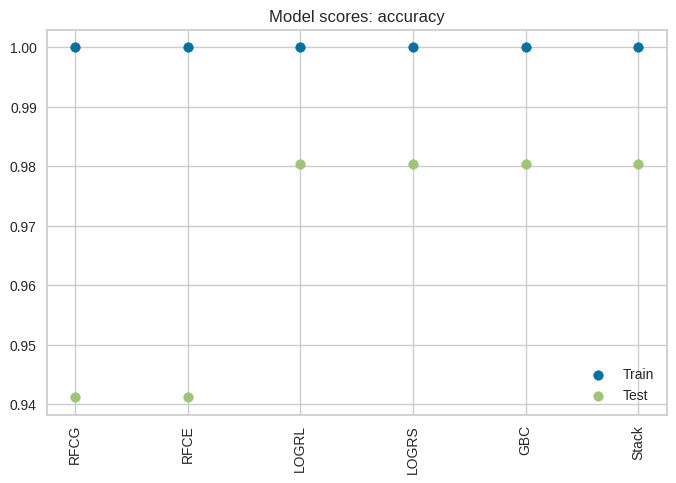

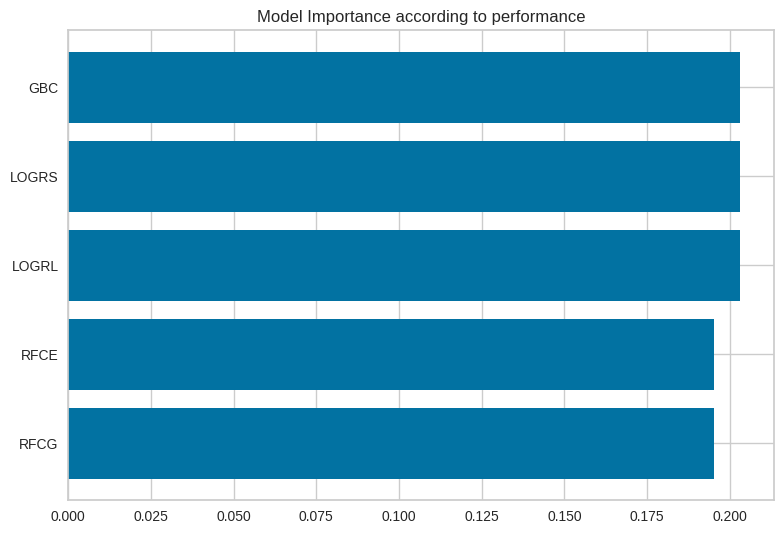

In [94]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered ROC/AUC

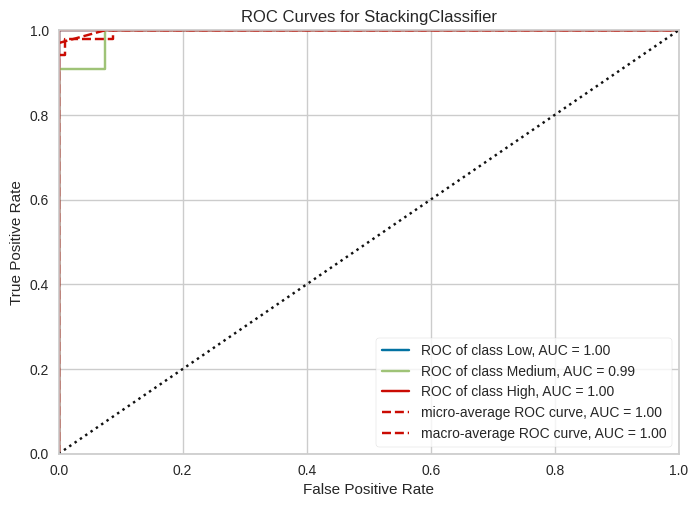

In [95]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Filtered Classification report

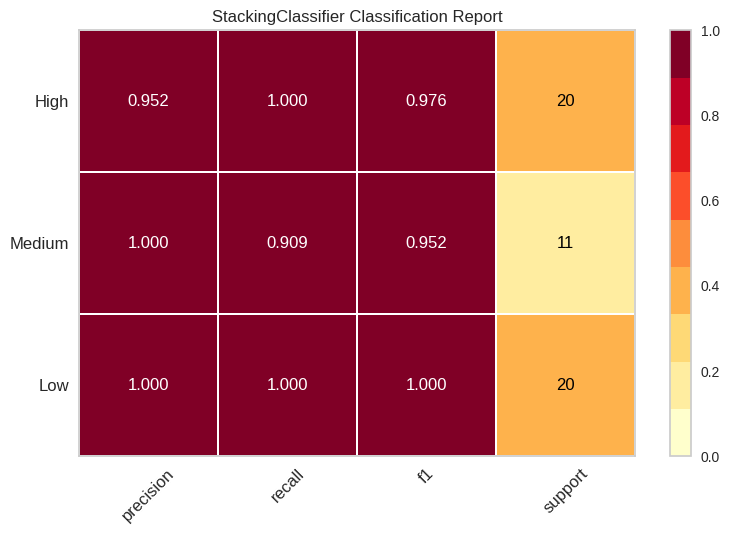

In [96]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Filtered Confusion matrix

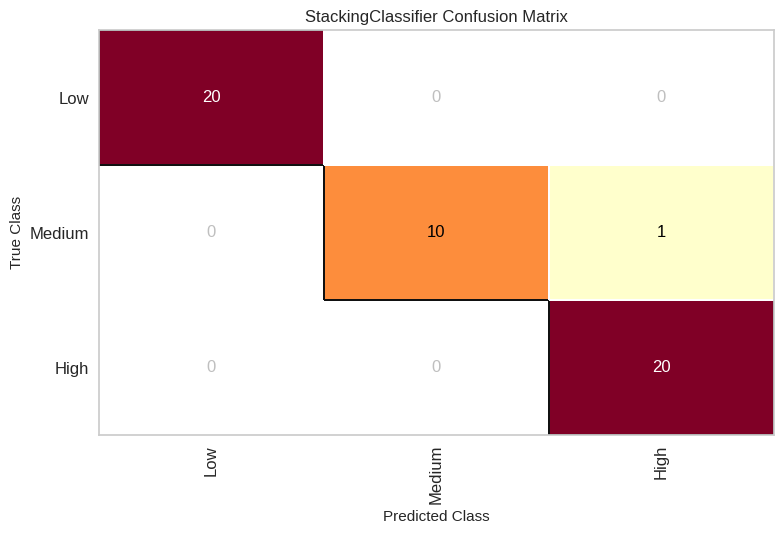

In [97]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Filtered Class prediction error

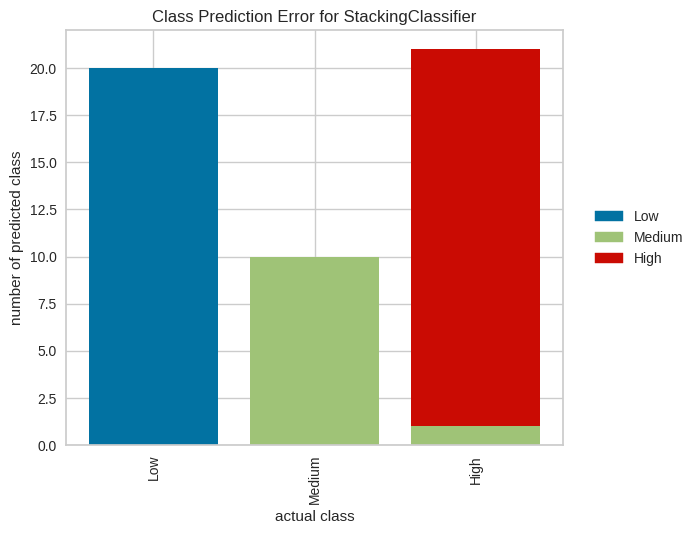

In [98]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

# Filtered Model inspection

### Filtered Model importance

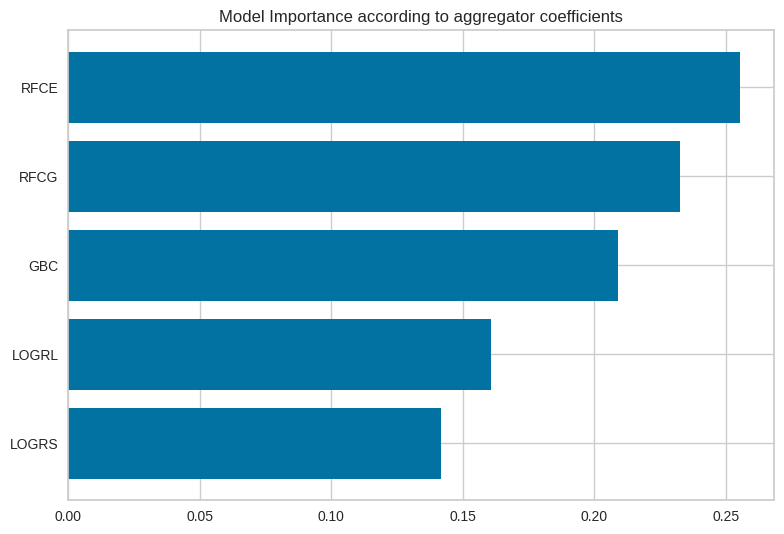

In [99]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

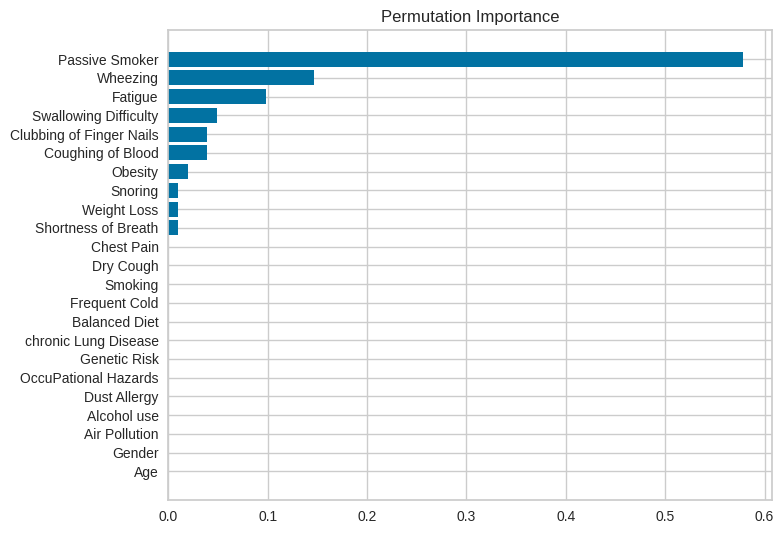

In [100]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [101]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [102]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

### Check those columns, they should be dropped

In [103]:
print(dropped_cols)

['Age', 'Air Pollution', 'Alcohol use', 'Balanced Diet', 'Chest Pain', 'Coughing of Blood', 'Dry Cough', 'Dust Allergy', 'Frequent Cold', 'Gender', 'Genetic Risk', 'Obesity', 'OccuPational Hazards', 'Shortness of Breath', 'Smoking', 'Snoring', 'Weight Loss', 'chronic Lung Disease']


# Final Model

In [104]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [105]:
reduce_schema('column_name', dropped_cols)

# Splitting

In [106]:
y = df[target_col] 

In [107]:
X = df.drop(target_col, axis=1) 

## Dimensions

In [108]:
nb_features = len(X.columns.tolist()) 

In [109]:
nb_targets = len(y.unique()) 

In [110]:
layer_size = nb_features + nb_targets + 2 

## Splitting data in train and test sets 

In [111]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

## Encoding

In [112]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test)) 

In [113]:
threshold_score = 0.7

#### Build final model

In [114]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Final Model fitting

In [115]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 110 ms, sys: 3.87 ms, total: 114 ms
Wall time: 3.56 s


StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=42))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f985c4a5fc0>),
                                                                                                  ('pipeline-2',
                                                                                                   Pipeline(ste...
                                                                                                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                   unknown_value=-1))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9870a799c0>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=1.0))])),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            max_depth=1,
                                                                            random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Final Model evaluation

### Final Model scoring

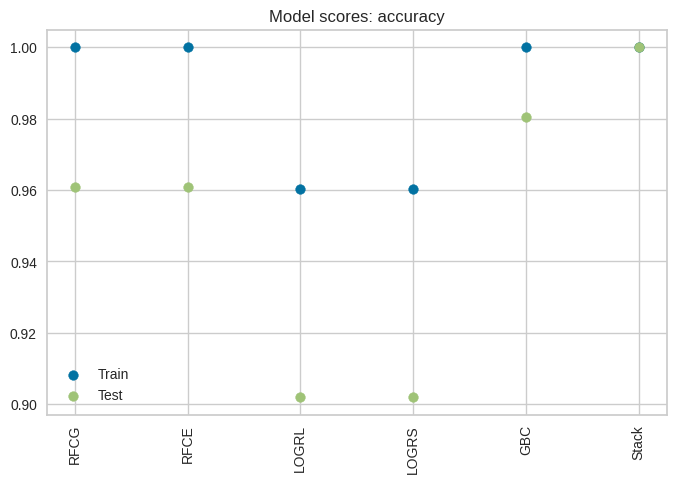

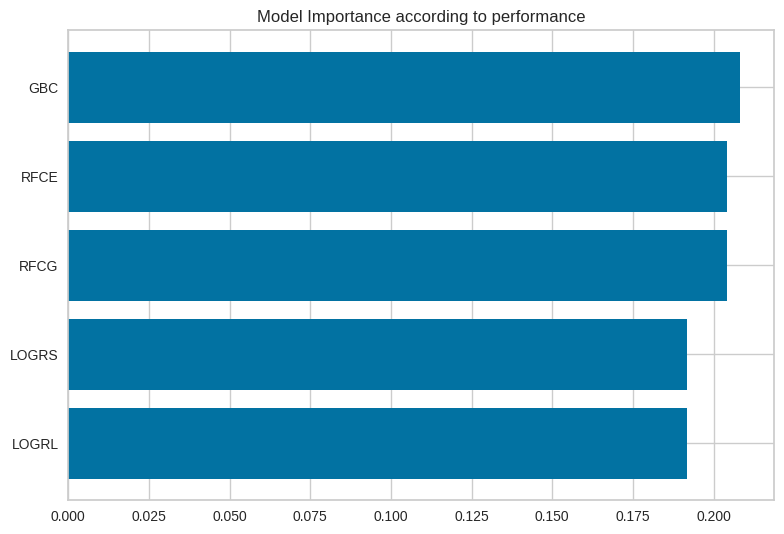

In [116]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

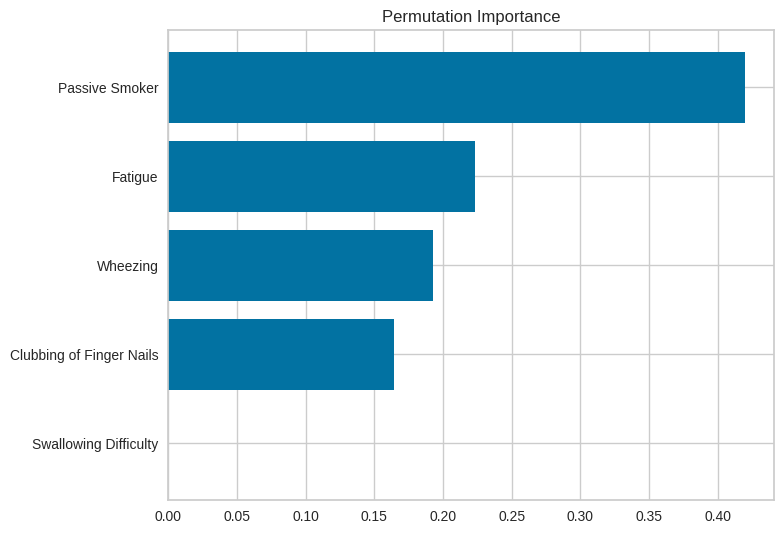

In [117]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

#### Final feature elimination

In [118]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final ROC/AUC

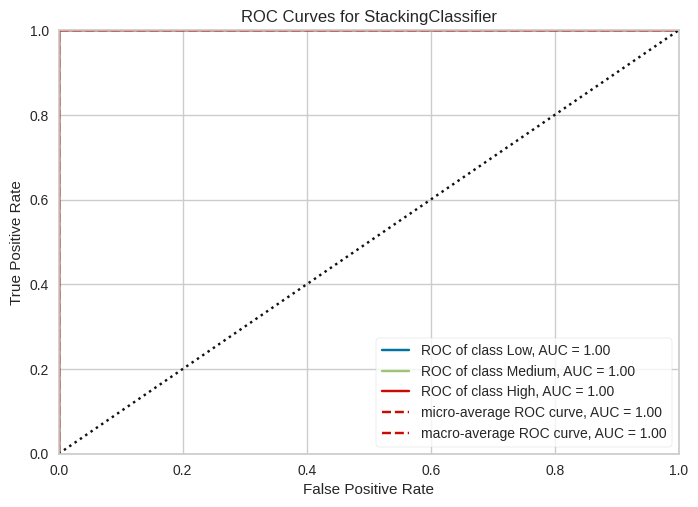

In [119]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Final Classification report

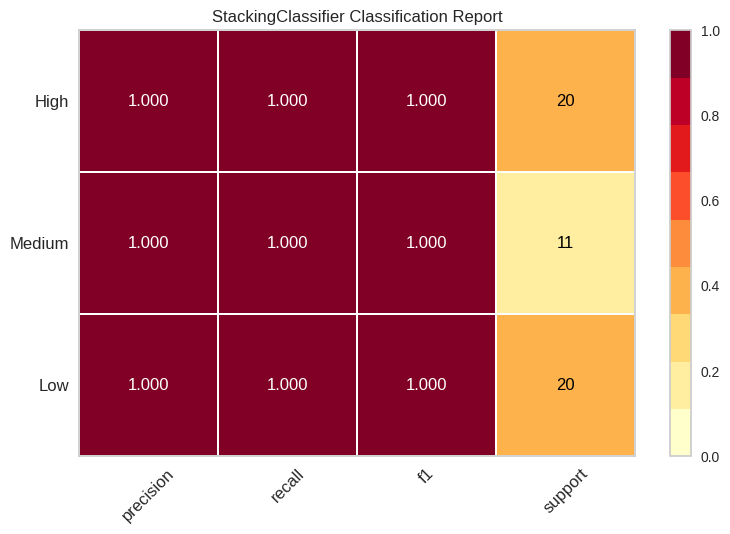

In [120]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Final Confusion matrix

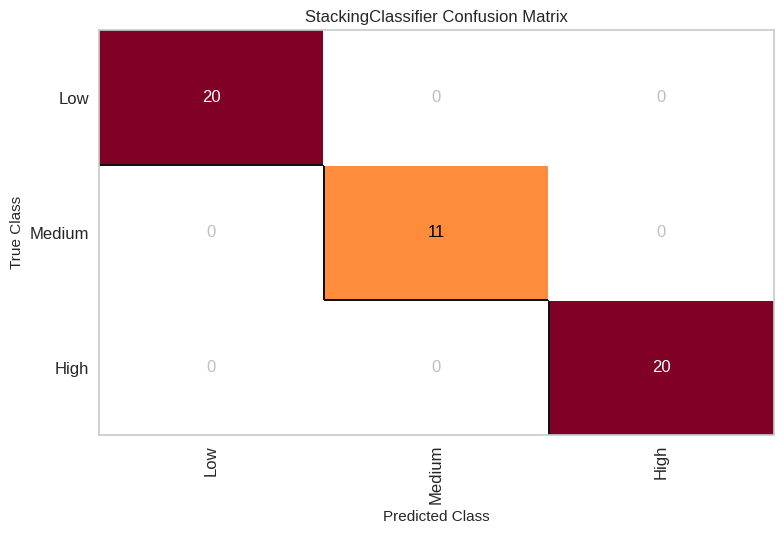

In [121]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Class prediction error

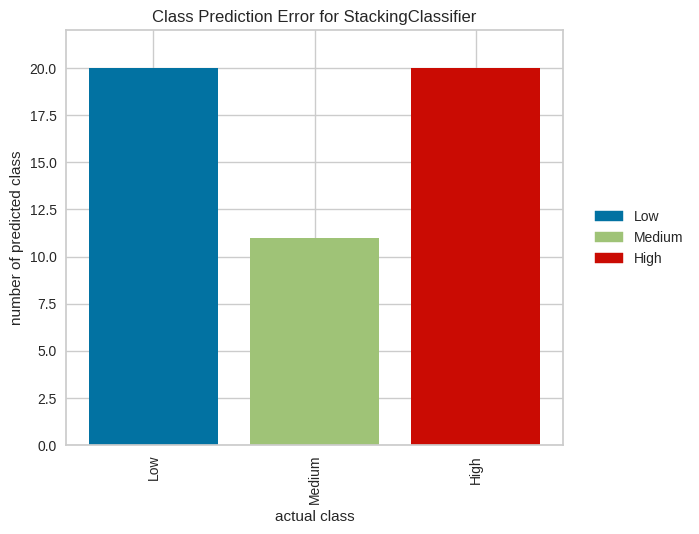

In [122]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

# Final Model inspection

### Final Model importance

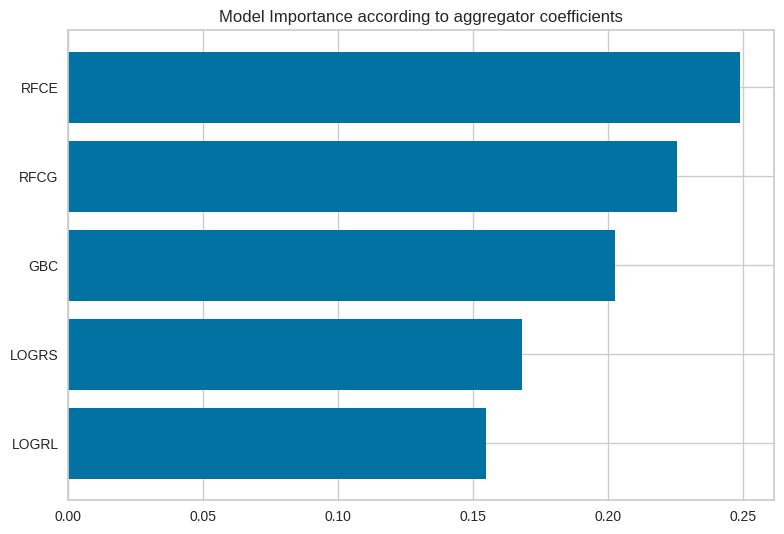

In [123]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

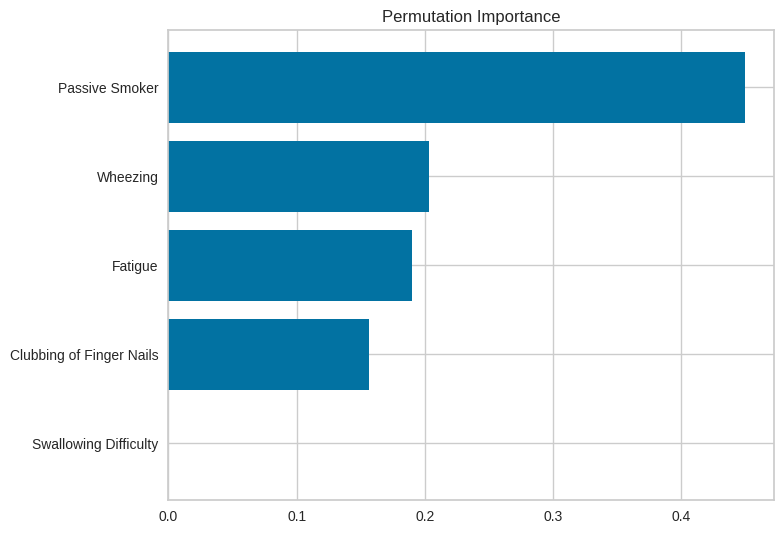

array([['Swallowing Difficulty', 0.0],
       ['Clubbing of Finger Nails', 0.15659955257270694],
       ['Fatigue', 0.1901565995525727],
       ['Wheezing', 0.203579418344519],
       ['Passive Smoker', 0.44966442953020136]], dtype=object)

In [124]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [125]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU, target_encoder=target_encoder)

interactive(children=(Dropdown(description='feature', options=('Passive Smoker', 'Fatigue', 'Wheezing', 'Swall…

# Deployment

## Save your model

In [126]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

## Generate your server

In [127]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port)

## [Test your API](./server.ipynb)

## Docker

In [128]:
dockerize(name, model, model_name, X, y, Docker_port)